# .txt files to NLP
This guide requires me to have all the NY speeches saved as .txt files. 

Then I can use the following guide: https://github.com/ramashelke/Presidential-Speech-Analysis-using-NLP/blob/master/Presidential%20Speech%20Analysis%20using%20NLP.ipynb


The data is New Year's Speeches held by Danish Prime Ministers



- TS: Thorvald Stauning / Socialdemokratiet / R
- HH: Hans Hedtoft / Socialdemokratiet / R
- EE: Erik Eriksen / Venstre / B
- JOK: Jens Otto Krag / Socialdemokratiet / R
- HB: Hilmar Baunsgaard / Radikale Venstre / M
- AJ: Anker Jørensen / Socialdemokratiet / R
- PS: Poul Schlüter / Det Konservative Folkeparti / B
- PNR: Poul Nyrup Rasmussen / Socialdemokratiet / R
- AF: Anders Fogh / Venstre / B
- LL: Lars Løkke / Venstre B / 
- HTS: Helle Thorning Schmidt / Socialdemokratiet / R
- MF: Mette Frederiksen / Socialdemokratiet / R

## Installing packages

In [105]:
# Installing packages
!pip install pandas
!pip install Sentida
!pip install wordcloud

# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import os

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
!pip install sentida
import sentida
from sentida import Sentida

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 431.6 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 34.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.0/770.0 kB 17.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 7.3 MB/s eta 0:00:0000:01
  Created wheel for sentida: filename=sentida-0.6.0-py3-none-any.whl size=61677 sha256=293961421211ec02d4f59e9a7f69649d92168d04847a421f22b346eb512a711f
  Stored in directory: /home/ucloud/.cache/pip/wheels/ae/f1/a6/40d2af01c768577b437a8f5796c08b85ff246315e1c064bbd3
Successfully built sentida


## next step: 🔥🔥🔥🔥🔥 make the loops work to avoid all the 🍝🍝🍝🍝🍝🍝🍝🍝

# Getting the data, i.e., the transcripts
I'll import .tx files containing the transcripts and call the cleaning_transcripts function.

In [5]:
import os
os.chdir('/work/CDS')

In [8]:
all_files = os.listdir("speeches_txt")
all_files

['2016_lars_loekke.txt',
 '2003_anders_fogh.txt',
 '1998_poul_nyrup.txt',
 '2005_anders_fogh.txt',
 '2004_anders_fogh.txt',
 '2015_helle_thorning.txt',
 '2012_helle_thorning.txt',
 '2007_anders_fogh.txt',
 '2006_anders_fogh.txt',
 '2008_anders_fogh.txt',
 '2009_anders_fogh.txt',
 '2019_lars_loekke.txt',
 '2020_mette_frederiksen.txt',
 '2000_poul_nyrup.txt',
 '2018_lars_loekke.txt',
 '2021_mette_frederiksen.txt',
 '2014_helle_thorning.txt',
 '2013_helle_thorning.txt',
 '2011_lars_loekke.txt',
 '.ipynb_checkpoints',
 '2010_lars_loekke.txt',
 '2017_lars_loekke.txt',
 '1999_poul_nyrup.txt',
 '2001_poul_nyrup.txt']

In [17]:
pwd

'/work/CDS/speeches_txt'

In [22]:
for file in all_files:
    if '.ipynb' not in file:
        f = open('{}'.format(file),'r+')

In [24]:
def opentxtfile(filename):
    with open(filename, 'r') as f:
        lines = [line.strip() for line in f if line.strip()]
        transcripts= ''.join(lines)
        
    return transcripts

Make sure directory is /work/CDS/speeches_txt

In [21]:
os.chdir('/work/CDS/speeches_txt/')

In [48]:
# Opening the transcripts
pn_1998 = opentxtfile('1998_poul_nyrup.txt')
pn_1999 = opentxtfile('1999_poul_nyrup.txt')
pn_2000 = opentxtfile('2000_poul_nyrup.txt')
pn_2001 = opentxtfile('2001_poul_nyrup.txt')
af_2003 = opentxtfile('2003_anders_fogh.txt')
af_2004 = opentxtfile('2004_anders_fogh.txt')
af_2005 = opentxtfile('2005_anders_fogh.txt')
af_2006 = opentxtfile('2006_anders_fogh.txt')
af_2007 = opentxtfile('2007_anders_fogh.txt')
af_2008 = opentxtfile('2008_anders_fogh.txt')
af_2009 = opentxtfile('2009_anders_fogh.txt')
ll_2010 = opentxtfile('2010_lars_loekke.txt')
ll_2011 = opentxtfile('2011_lars_loekke.txt')
ht_2012 = opentxtfile('2012_helle_thorning.txt')
ht_2013 = opentxtfile('2013_helle_thorning.txt')
ht_2014 = opentxtfile('2014_helle_thorning.txt')
ht_2015 = opentxtfile('2015_helle_thorning.txt')
ll_2016 = opentxtfile('2016_lars_loekke.txt')
ll_2017 = opentxtfile('2017_lars_loekke.txt')
ll_2018 = opentxtfile('2018_lars_loekke.txt')
ll_2019 = opentxtfile('2019_lars_loekke.txt')
mf_2020 = opentxtfile('2020_mette_frederiksen.txt')
mf_2021 = opentxtfile('2021_mette_frederiksen.txt')

# Cleaning the transcripts

In [25]:
#### loop this !!!! 

def cleaning_transcripts(transcripts):
    import string
    transcripts = transcripts.lower()
    transcripts = re.sub('\((.*?\))', '', transcripts)
    transcripts = re.sub('\[.*?\]', '', transcripts)
    # transcripts = re.sub('[%s]' % re.escape(string.punctuation), ' ', transcripts)
    transcripts = re.sub('\w*\d\w*', '', transcripts)
    return transcripts

In [50]:
pn_1998_c = cleaning_transcripts(pn_1998)
pn_1999_c = cleaning_transcripts(pn_1999)
pn_2000_c = cleaning_transcripts(pn_2000)
pn_2001_c = cleaning_transcripts(pn_2001)
af_2003_c = cleaning_transcripts(af_2003)
af_2004_c = cleaning_transcripts(af_2004)
af_2005_c = cleaning_transcripts(af_2005)
af_2006_c = cleaning_transcripts(af_2006)
af_2007_c = cleaning_transcripts(af_2007)
af_2008_c = cleaning_transcripts(af_2008)
af_2009_c = cleaning_transcripts(af_2009)
ll_2010_c = cleaning_transcripts(ll_2010)
ll_2011_c = cleaning_transcripts(ll_2011)
ht_2012_c = cleaning_transcripts(ht_2012)
ht_2013_c = cleaning_transcripts(ht_2013)
ht_2014_c = cleaning_transcripts(ht_2014)
ht_2015_c = cleaning_transcripts(ht_2015)
ll_2016_c = cleaning_transcripts(ll_2016)
ll_2017_c = cleaning_transcripts(ll_2017)
ll_2018_c = cleaning_transcripts(ll_2018)
ll_2019_c = cleaning_transcripts(ll_2019)
mf_2020_c = cleaning_transcripts(mf_2020)
mf_2021_c = cleaning_transcripts(mf_2021)

## Stop words

Used this list: https://gist.github.com/berteltorp/0cf8a0c7afea7f25ed754f24cfc2467b

In [51]:
os.chdir('/work/CDS/')

In [52]:
with open("stopord.txt", 'r') as f_object:
    stop_words = f_object.read().split()

In [53]:
# danish stopwords
# npm install stopwords-da
# Run npm install -g npm@9.1.1 to update!

In [54]:
stop_words

['ad',
 'af',
 'aldrig',
 'alene',
 'alle',
 'allerede',
 'alligevel',
 'alt',
 'altid',
 'anden',
 'andet',
 'andre',
 'at',
 'bag',
 'bare',
 'begge',
 'bl.a.',
 'blandt',
 'blev',
 'blive',
 'bliver',
 'burde',
 'bør',
 'ca.',
 'da',
 'de',
 'dem',
 'den',
 'denne',
 'dens',
 'der',
 'derefter',
 'deres',
 'derfor',
 'derfra',
 'deri',
 'dermed',
 'derpå',
 'derved',
 'det',
 'dette',
 'dig',
 'din',
 'dine',
 'disse',
 'dit',
 'dog',
 'du',
 'efter',
 'egen',
 'ej',
 'eller',
 'ellers',
 'en',
 'end',
 'endnu',
 'ene',
 'eneste',
 'enhver',
 'ens',
 'enten',
 'er',
 'et',
 'f.eks.',
 'far',
 'fem',
 'fik',
 'fire',
 'flere',
 'flest',
 'fleste',
 'for',
 'foran',
 'fordi',
 'forrige',
 'fra',
 'fx',
 'få',
 'får',
 'før',
 'først',
 'gennem',
 'gjorde',
 'gjort',
 'god',
 'godt',
 'gør',
 'gøre',
 'gørende',
 'ham',
 'han',
 'hans',
 'har',
 'havde',
 'have',
 'hej',
 'hel',
 'heller',
 'helt',
 'hen',
 'hende',
 'hendes',
 'henover',
 'her',
 'herefter',
 'heri',
 'hermed',
 'herp

# Remove the stopwords

!!! OBS NOGLE STOPWORD VIL JEG BEHOLDE, og loop this

In [55]:
def remove_stopwords(transcripts):
    tokenized_transcripts=word_tokenize(transcripts)
    transcripts_wo_stopwords= [w for w in tokenized_transcripts if not w in stop_words] 
    transcripts_wo_stopwords=' '.join(transcripts_wo_stopwords)    
    return transcripts_wo_stopwords

#text = ' '.join([word for word in text.split() if word not in stopwordlist])

In [56]:
pn_1998_c = remove_stopwords(pn_1998_c)
pn_1999_c = remove_stopwords(pn_1999_c)
pn_2000_c = remove_stopwords(pn_2000_c)
pn_2001_c = remove_stopwords(pn_2001_c)
af_2003_c = remove_stopwords(af_2003_c)
af_2004_c = remove_stopwords(af_2004_c)
af_2005_c = remove_stopwords(af_2005_c)
af_2006_c = remove_stopwords(af_2006_c)
af_2007_c = remove_stopwords(af_2007_c)
af_2008_c = remove_stopwords(af_2008_c)
af_2009_c = remove_stopwords(af_2009_c)
ll_2010_c = remove_stopwords(ll_2010_c)
ll_2011_c = remove_stopwords(ll_2011_c)
ht_2012_c = remove_stopwords(ht_2012_c)
ht_2013_c = remove_stopwords(ht_2013_c)
ht_2014_c = remove_stopwords(ht_2014_c)
ht_2015_c = remove_stopwords(ht_2015_c)
ll_2016_c = remove_stopwords(ll_2016_c)
ll_2017_c = remove_stopwords(ll_2017_c)
ll_2018_c = remove_stopwords(ll_2018_c)
ll_2019_c = remove_stopwords(ll_2019_c)
mf_2020_c = remove_stopwords(mf_2020_c)
mf_2021_c = remove_stopwords(mf_2021_c)

In [57]:
df_transcripts = pd.DataFrame({"Transcripts" :(pn_1998_c,pn_1999_c,pn_2000_c,pn_2001_c,af_2003_c,af_2004_c,
                                               af_2005_c,af_2006_c,af_2007_c,af_2008_c,af_2009_c,ll_2010_c,
                                               ll_2011_c,ht_2012_c,ht_2013_c,ht_2014_c,ht_2015_c,ll_2016_c,
                                               ll_2017_c,ll_2018_c,ll_2019_c,mf_2020_c,mf_2021_c) }, 
                              index=("1998","1999","2000","2001","2003","2004",
                                     "2005","2006","2007","2008","2009","2010",
                                     "2011","2012","2013","2014","2015","2016",
                                     "2017","2018","2019","2020","2021")) 

In [58]:
Minister = ["Poul Nyrup","Poul Nyrup","Poul Nyrup","Poul Nyrup",
             "Anders Fogh","Anders Fogh","Anders Fogh","Anders Fogh",
             "Anders Fogh","Anders Fogh","Anders Fogh",
             "Lars Løkke","Lars Løkke","Helle Thorning Schmidt","Helle Thorning Schmidt",
             "Helle Thorning Schmidt","Helle Thorning Schmidt",
             "Lars Løkke","Lars Løkke", "Lars Løkke","Lars Løkke",
             "Mette Frederiksen","Mette Frederiksen"]
df_transcripts['Minister'] = Minister

In [59]:
df_transcripts

,Transcripts,Minister
1998,"godaften . skelsættende år danmark . år , dans...",Poul Nyrup
1999,godaften ! mennesker nytåret naturlig anlednin...,Poul Nyrup
2000,godaften – første dag nye årtusinde . sandelig...,Poul Nyrup
2001,"godaften – nytår.i oktober besøgte sydkorea , ...",Poul Nyrup
2003,godaften – nytår ! danske familier netop fejre...,Anders Fogh
2004,godaften – nytår ! måneder tid afslappede form...,Anders Fogh
2005,"godaften ! nytår præget tragedie , kender fuld...",Anders Fogh
2006,godaften ! år stod verden ansigt ansigt ufatte...,Anders Fogh
2007,"godaften ! går tog afsked . år , længe huske d...",Anders Fogh
2008,godaften ! dag taget hul år . friskt ubrugt li...,Anders Fogh


### Adding party information to dataframe

In [60]:
for col in df_transcripts: 
    print(df_transcripts['Minister'].unique())

['Poul Nyrup' 'Anders Fogh' 'Lars Løkke' 'Helle Thorning Schmidt'
 'Mette Frederiksen']
['Poul Nyrup' 'Anders Fogh' 'Lars Løkke' 'Helle Thorning Schmidt'
 'Mette Frederiksen']


In [61]:
# Write a function that does the translation
def party (row):
    if row['Minister']== 'Poul Nyrup':
        return 'Socialdemokratiet'
    if row['Minister']== 'Anders Fogh':
        return 'Venstre'
    if row['Minister']== 'Lars Løkke':
        return 'Venstre'
    if row['Minister']== 'Helle Thorning Schmidt':
        return 'Socialdemokratiet'
    if row['Minister']== 'Mette Frederiksen':
        return 'Socialdemokratiet'
    return 'Other'    

In [62]:
df_transcripts['Party'] = df_transcripts.apply (lambda row: party(row), axis=1)

In [63]:
def wing (row):
    if row['Party']== 'Socialdemokratiet':
        return 'Red'
    if row['Party']== 'Venstre':
        return 'Blue'
    if row['Party']== 'Det Konservative Folkeparti':
        return 'Blue'
    if row['Party']== 'Radikale Venstre':
        return 'Middle'
    return 'Other' 

In [64]:
df_transcripts['Wing'] = df_transcripts.apply (lambda row: wing(row), axis=1)

In [66]:
df_transcripts

,Transcripts,Minister,Party,Wing
1998,"godaften . skelsættende år danmark . år , dans...",Poul Nyrup,Socialdemokratiet,Red
1999,godaften ! mennesker nytåret naturlig anlednin...,Poul Nyrup,Socialdemokratiet,Red
2000,godaften – første dag nye årtusinde . sandelig...,Poul Nyrup,Socialdemokratiet,Red
2001,"godaften – nytår.i oktober besøgte sydkorea , ...",Poul Nyrup,Socialdemokratiet,Red
2003,godaften – nytår ! danske familier netop fejre...,Anders Fogh,Venstre,Blue
2004,godaften – nytår ! måneder tid afslappede form...,Anders Fogh,Venstre,Blue
2005,"godaften ! nytår præget tragedie , kender fuld...",Anders Fogh,Venstre,Blue
2006,godaften ! år stod verden ansigt ansigt ufatte...,Anders Fogh,Venstre,Blue
2007,"godaften ! går tog afsked . år , længe huske d...",Anders Fogh,Venstre,Blue
2008,godaften ! dag taget hul år . friskt ubrugt li...,Anders Fogh,Venstre,Blue


## Making dataframe subsets

In [78]:
socialdemokratiet_df = df_transcripts[df_transcripts["Party"]=="Socialdemokratiet"]
venstre_df = df_transcripts[df_transcripts["Party"]=="Venstre"]
konservative_df = df_transcripts[df_transcripts["Party"]=="Det Konservative Folkeparti"]
radikale_df = df_transcripts[df_transcripts["Party"]=="Radikale Venstre"]

red_df = df_transcripts[df_transcripts["Wing"]=="Red"]
blue_df = df_transcripts[df_transcripts["Wing"]=="Blue"]

In [77]:
#socialdemokratiet_df
venstre_df
#konservative_df
#radikale_df

,Transcripts,Minister,Party,Wing
2003,godaften – nytår ! danske familier netop fejre...,Anders Fogh,Venstre,Blue
2004,godaften – nytår ! måneder tid afslappede form...,Anders Fogh,Venstre,Blue
2005,"godaften ! nytår præget tragedie , kender fuld...",Anders Fogh,Venstre,Blue
2006,godaften ! år stod verden ansigt ansigt ufatte...,Anders Fogh,Venstre,Blue
2007,"godaften ! går tog afsked . år , længe huske d...",Anders Fogh,Venstre,Blue
2008,godaften ! dag taget hul år . friskt ubrugt li...,Anders Fogh,Venstre,Blue
2009,"godaften ! første dag nye år . spændte , år br...",Anders Fogh,Venstre,Blue
2010,"godaften.i går tog afsked årti , lærte kende n...",Lars Løkke,Venstre,Blue
2011,"tror , : nytåret tid året , status . tænker ti...",Lars Løkke,Venstre,Blue
2016,"aften.i december deltog arrangement avis , hve...",Lars Løkke,Venstre,Blue


# Sentida
Using Sentida2 for Python 
https://github.com/Guscode/Sentida2/blob/main/sentida_totorial.ipynb

In [111]:
import sentida
!pip install spacy
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 14.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.7/490.7 kB 8.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.9/815.9 kB 3.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 40.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 40.0 MB/s eta 0:00:0000:0100:01


In [139]:
from sentida import Sentida

In [142]:
# sentiment score in loop

sent_scores = []

In [146]:
for text in df_transcripts['Transcripts']:
    sentiment_score = Sentida().sentida(text,output = "total")
    sent_scores.append(sentiment_score)

In [147]:
sent_scores

[25.636557632275135,
 35.613724019576715,
 36.62444022645503,
 58.24476873359788,
 25.294088018518533,
 40.07159213359788,
 0.2891493425926084,
 50.2707591600529,
 53.9822665608466,
 32.93407550793653,
 29.373176037037044,
 62.89905692063493,
 54.443753935185185,
 32.90826434656088,
 71.95737804074076,
 45.99793650793652,
 48.47007936507937,
 33.70995711111112,
 57.665050350264565,
 37.506845119841266,
 20.356274851851868,
 32.152010582010575,
 27.87044889100528,
 25.636557632275135,
 35.613724019576715,
 36.62444022645503,
 58.24476873359788,
 25.294088018518533,
 40.07159213359788,
 0.2891493425926084,
 50.2707591600529,
 53.9822665608466,
 32.93407550793653,
 29.373176037037044,
 62.89905692063493,
 54.443753935185185,
 32.90826434656088,
 71.95737804074076,
 45.99793650793652,
 48.47007936507937,
 33.70995711111112,
 57.665050350264565,
 37.506845119841266,
 20.356274851851868,
 32.152010582010575,
 27.87044889100528]

In [136]:
Sentida().sentida(pn_1998,output = "total")



37.39237379894181

In [ ]:
mf_2021 = opentxtfile('2021_mette_frederiksen.txt')

In [80]:
# Create Word Clouds

In [93]:
wordcloud_red = WordCloud().generate(' '.join(red_df['Transcripts']))
wordcloud_blue = WordCloud().generate(' '.join(blue_df['Transcripts']))

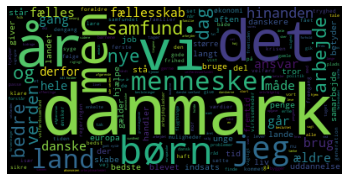

In [94]:
wordcloud_red
plt.imshow(wordcloud_red)
plt.axis("off")
plt.show()

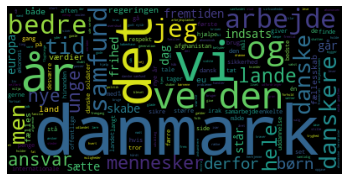

In [95]:
wordcloud_blue
plt.imshow(wordcloud_blue)
plt.axis("off")
plt.show()

In [234]:
def word_cloud(name,transcript,color_map,x):
    wc = WordCloud(stopwords=stop_words, width = 300, height = 250,background_color="white", colormap=color_map,
                   max_font_size=75, random_state=60)
    plt.rcParams['figure.figsize'] = [x,x]
    wc.generate(transcript)
    plt.subplot(3,4,3)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(name)
    plt.show()

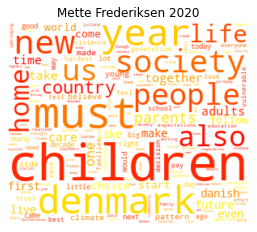

In [119]:
word_cloud('Mette Frederiksen 2020',twentytwenty_cleaned,'autumn',20)

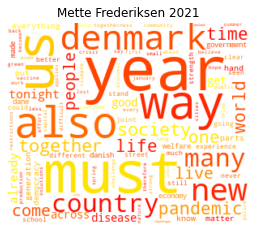

In [118]:
word_cloud('Mette Frederiksen 2021',twentyone_cleaned,'autumn',20)

# Creating a document-term matrix
Creating a document-term matrix using CountVectorizer, and excluding the common English stop words

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_transcripts.Transcripts)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_transcripts.index
data_dtm

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aalborg,abolish,absolutely,abuse,accept,accident,accomplished,achieve,achievement,act,...,write,writing,wrong,wrote,year,years,yes,young,younger,zealand
2021,0,0,1,0,1,1,1,0,1,0,...,0,0,1,0,17,3,1,1,0,3
2020,1,1,0,1,0,0,0,1,0,1,...,1,1,0,2,11,5,0,4,1,0


In [121]:
data = data_dtm
data = data.transpose()
data

,2021,2020
aalborg,0,1
abolish,0,1
absolutely,1,0
abuse,0,1
accept,1,0
...,...,...
years,3,5
yes,1,0
young,1,4
younger,0,1


# Finding the top 25 words

In [122]:
top_words=[]
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(25)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'2021': [('year', 17),
  ('way', 12),
  ('denmark', 10),
  ('new', 8),
  ('society', 8),
  ('country', 8),
  ('pandemic', 7),
  ('world', 7),
  ('life', 7),
  ('time', 7),
  ('people', 6),
  ('tonight', 5),
  ('danish', 4),
  ('democracy', 4),
  ('come', 4),
  ('disease', 4),
  ('economy', 4),
  ('know', 4),
  ('welfare', 4),
  ('parts', 4),
  ('government', 4),
  ('good', 4),
  ('say', 3),
  ('climate', 3),
  ('copenhagen', 3)],
 '2020': [('children', 29),
  ('denmark', 16),
  ('new', 12),
  ('society', 11),
  ('year', 11),
  ('people', 10),
  ('life', 8),
  ('home', 8),
  ('country', 7),
  ('parents', 7),
  ('care', 6),
  ('adults', 6),
  ('future', 5),
  ('like', 5),
  ('danish', 5),
  ('time', 5),
  ('years', 5),
  ('believe', 4),
  ('world', 4),
  ('climate', 4),
  ('live', 4),
  ('pattern', 4),
  ('make', 4),
  ('follow', 4),
  ('young', 4)]}

# Creating a list of words that we don't want in our word clouds

Even after removing the top words from the word cloud, I wasn't quite happy with the way it turned out. So I decided to manually add some words in the list that weren't stop words or top words but yet they didnt bring in much value to the word clouds. 

Additionally, I decided to keep 'great' as it is an important word from Donald Trump's first campaign slogan. After creating the list, I added it to stop_words so that those words won't appear in the word clouds.

In [124]:
additional_stop_words=[]
for key, val in top_dict.items():
    for i in range(15):
        additional_stop_words.append(val[i][0])
# additional_stop_words.remove('great')
additional_stop_words.extend(['see','come','even'])
stop_words+=additional_stop_words

# And Creating the Final Word Clouds

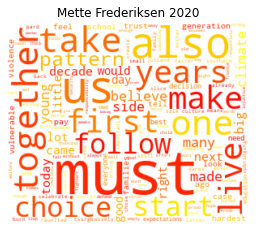

In [125]:
word_cloud('Mette Frederiksen 2020',twentytwenty_cleaned,'autumn',20)

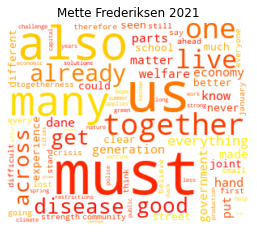

In [126]:
word_cloud('Mette Frederiksen 2021',twentyone_cleaned,'autumn',20)

# Size of Vocabulary

We can figure out the size of the vocabulary by using the document term matrix. We look for words with non-zero values for each president.

In [128]:
unique_list = []
full_names=['Mette 2020','Mette 2021']
for president in data.columns:
    uniques = data[president].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['Speaker & Year', 'Total Unique words'])
data_words 

,Speaker & Year,Total Unique words
0,Mette 2020,639
1,Mette 2021,463


## TextBlob Module:
Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.

## Sentiment Labels:
Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.

Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [132]:
!pip install textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df=pd.DataFrame({'Transcripts': [twentyone_cleaned,twentytwenty_cleaned]},index=['Mette 2021', 'Mette 2020'])
df

,Speaker & Year,Total Unique words,Polarity,Subjectivity
0,Mette 2020,639,0.0,0.0
1,Mette 2021,463,0.0,0.0


In [133]:
data_words['Polarity'] = data_words['Speaker & Year'].apply(pol)
data_words['Subjectivity'] = data_words['Speaker & Year'].apply(sub)
data_words

,Speaker & Year,Total Unique words,Polarity,Subjectivity
0,Mette 2020,639,0.0,0.0
1,Mette 2021,463,0.0,0.0


## Polarity plot

In [108]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_fn(df_transcript,measure):
    fig = plt.figure(figsize=(30, 2))

    # draw lines
    xmin = -1
    xmax = 1
    y = 5
    height = 2

    plt.hlines(y, xmin, xmax)
    plt.vlines(xmin, y - height / 2., y + height / 2.)
    plt.vlines(xmax, y - height / 2., y + height / 2.)

    # draw a point on the line
    px1 = df_Deathof_transcript[measure]['Barack']
    plt.plot(px1,y, 'bo', ms = 30, mfc = 'b')

    px2 = df_Deathof_transcript[measure]['Donald']
    plt.plot(px2,y, 'ro', ms = 30, mfc = 'r')
    
    
    plt.title(measure, loc='center', pad=50,fontsize=50)
    plt.text(px1,y+1,round(px1,2),horizontalalignment='center',verticalalignment='center',fontsize=25)
    plt.text(px2,y+1,round(px2,2),horizontalalignment='center',verticalalignment='center',fontsize=25)

    # add numbers
    if(measure=='Polarity'):
        plt.text(xmin - 0.01, y, 'Negative(-1)', horizontalalignment='right',verticalalignment='center',fontsize=30)
       
        plt.text(px1,y-1.5,'Barack Obama',horizontalalignment='left',verticalalignment='center',fontsize=25)
        plt.text(px2,y-1.5,'Donald Trump',horizontalalignment='right',verticalalignment='center',fontsize=25)
        plt.text(xmax + 0.01, y, 'Positive(+1)', horizontalalignment='left',verticalalignment='center',fontsize=30)
       
    else:
        plt.text(xmin - 0.01, y, 'Objective(0)', horizontalalignment='right',verticalalignment='center',fontsize=30)
        plt.text(xmin-0.1 , y-1.5, 'Fact', horizontalalignment='left',verticalalignment='center',fontsize=30)

        plt.text(px1,y-1.5,'Barack Obama',horizontalalignment='right',verticalalignment='center',fontsize=25)
        plt.text(px2,y-1.5,'Donald Trump',horizontalalignment='left',verticalalignment='center',fontsize=25)
        plt.text(xmax + 0.01, y, 'Subjective(1)', horizontalalignment='left',verticalalignment='center',fontsize=30)
        plt.text(xmax + 0.04, y-1.5, 'Opinion', horizontalalignment='left',verticalalignment='center',fontsize=30)
       

    plt.axis('off')
    plt.show()

In [109]:
# Other

In [110]:
# trying to read data with a loop

import codecs 

data_folder = os.path.join(os.getcwd(),'speeches_txt')

data = []


for root, folders, files in os.walk(data_folder):
    for file in files:
        path = os.path.join(root,file)
        with open(path) as inf:
            data.append(inf.read())